In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.datasets import imdb


In [3]:
(X_train_full, y_train_full), (X_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
X = np.concatenate([X_train_full,X_test])
y = np.concatenate([y_train_full,y_test])

In [5]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
index_word = { v:k for k,v in word_index.items()}

In [7]:
max_len = pd.Series(X).apply(len).max()

In [8]:
def make_sentence(x):
    sentence = []
    for i in x:
        word = index_word.get(i)
        if word is None:
            word = ' '
        sentence.append(word)
    return ' '.join(sentence)

In [9]:
X = pd.Series(X).apply(make_sentence)

In [10]:
words = []
for i in X:
    words.extend(i.split())
unique_word = list(set(words))

In [11]:
count = Counter(words)

In [12]:
most_words = count.most_common()

In [13]:
most_words = most_words[0:1000]

In [14]:
most_words = [ i for i, j in most_words]

In [15]:
def find_word(x):
    result = []
    for i in most_words:
        if i in x.split():
            result.append(i)
    return result

In [16]:
X = X.apply(find_word)

In [17]:
word_index = { v:i+1 for i, v in enumerate(most_words)}

In [18]:
index_word = { v:k for k, v in word_index.items()}

In [19]:
def sentence_int(x):
    result = []
    for i in x:
        result.append(word_index[i])
    return result

In [20]:
X = X.apply(sentence_int)

In [21]:
input_x = len(X)
input_y = len(most_words)
tmp = np.zeros((input_x,input_y),dtype=np.float32)
for i in range(input_x):
    for j in X[i]:
        tmp[i,(j-1)] += 1  

In [22]:
X_train_full, X_test, y_train_full, y_test = train_test_split(tmp,y,test_size=.2)

In [23]:
X_train, X_validation, y_train, y_validation =\
train_test_split(X_train_full,y_train_full, test_size=.2)

In [24]:
input_shape= X_train.shape[1:]
third_model = Sequential()
third_model.add(Dense(512,activation='relu',input_shape=input_shape))
third_model.add(Dense(256,activation='relu'))
third_model.add(Dense(128,activation='relu'))
third_model.add(Dense(1,activation='sigmoid'))

In [25]:
optimizer = 'rmsprop'
loss = 'binary_crossentropy'
metrics  = ['accuracy']
third_model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = metrics
)

In [26]:
third_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               512512    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 676,865
Trainable params: 676,865
Non-trainable params: 0
_________________________________________________________________


In [27]:
third_model.fit(X_train,
               y_train,
               epochs=20,
               validation_data=(X_validation,y_validation),
               batch_size=400)

Epoch 1/20
80/80 [==============================] - 4s 41ms/step - loss: 0.4751 - accuracy: 0.7780 - val_loss: 0.3589 - val_accuracy: 0.8438
Epoch 2/20
80/80 [==============================] - 3s 34ms/step - loss: 0.3229 - accuracy: 0.8601 - val_loss: 0.4015 - val_accuracy: 0.8139
Epoch 3/20
80/80 [==============================] - 3s 34ms/step - loss: 0.2688 - accuracy: 0.8850 - val_loss: 0.3591 - val_accuracy: 0.8535
Epoch 4/20
80/80 [==============================] - 3s 34ms/step - loss: 0.1879 - accuracy: 0.9225 - val_loss: 0.6295 - val_accuracy: 0.8025
Epoch 5/20
80/80 [==============================] - 3s 34ms/step - loss: 0.1189 - accuracy: 0.9559 - val_loss: 0.6123 - val_accuracy: 0.8205
Epoch 6/20
80/80 [==============================] - 3s 34ms/step - loss: 0.0716 - accuracy: 0.9792 - val_loss: 0.6458 - val_accuracy: 0.8524
Epoch 7/20
80/80 [==============================] - 3s 34ms/step - loss: 0.0865 - accuracy: 0.9828 - val_loss: 0.6332 - val_accuracy: 0.8515
Epoch 8/20
80

In [28]:
third_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.8841 - accuracy: 0.8496


[1.8840521574020386, 0.8496000170707703]

In [29]:
dt = make_sentence(X[1000])

In [30]:
dt = """
The popcorn's been popped, the sweatpants are on, and the evening is your oyster. Your next challenge: Figuring out exactly which of the great movies available to you is the one you're going to watch tonight. No matter what you're looking for—a rom-com, a murder mystery, a great musical movie—there are plenty of classics to watch in your spare time. After all, if the past two years cooped up in our homes has taught us anything, it's that there's nothing better than a movie to take us to a place that's far, far away from our current one. These must-watch movies are modern classics, the best of the best, the essential films that millions of people are probably jealous that you're getting to see for the first time. There are a few that might be outside your comfort zone, and a couple that'll introduce you to cultures and environments you know nothing about. This list may be long, but FOMO is eternal.
"""

In [31]:
dt

"\nThe popcorn's been popped, the sweatpants are on, and the evening is your oyster. Your next challenge: Figuring out exactly which of the great movies available to you is the one you're going to watch tonight. No matter what you're looking for—a rom-com, a murder mystery, a great musical movie—there are plenty of classics to watch in your spare time. After all, if the past two years cooped up in our homes has taught us anything, it's that there's nothing better than a movie to take us to a place that's far, far away from our current one. These must-watch movies are modern classics, the best of the best, the essential films that millions of people are probably jealous that you're getting to see for the first time. There are a few that might be outside your comfort zone, and a couple that'll introduce you to cultures and environments you know nothing about. This list may be long, but FOMO is eternal.\n"

In [32]:
def sentence_int1(x):
    result = []
    for i in x.split():
        if word_index.get(i) is not None:
            result.append(word_index.get(i))
    return result

In [33]:
new_dt = sentence_int1(dt)

In [34]:
dt

"\nThe popcorn's been popped, the sweatpants are on, and the evening is your oyster. Your next challenge: Figuring out exactly which of the great movies available to you is the one you're going to watch tonight. No matter what you're looking for—a rom-com, a murder mystery, a great musical movie—there are plenty of classics to watch in your spare time. After all, if the past two years cooped up in our homes has taught us anything, it's that there's nothing better than a movie to take us to a place that's far, far away from our current one. These must-watch movies are modern classics, the best of the best, the essential films that millions of people are probably jealous that you're getting to see for the first time. There are a few that might be outside your comfort zone, and a couple that'll introduce you to cultures and environments you know nothing about. This list may be long, but FOMO is eternal.\n"

In [35]:
input_y = len(most_words)
tmp = np.zeros((1,input_y),dtype=np.float32)
for i in new_dt:
    tmp[0,(i-1)] += 1  

In [36]:
np.where(third_model.predict(tmp)>.5,1,0)

array([[1]])

In [37]:
input_shape= X_train.shape[1:]
third_model = Sequential()
third_model.add(Dense(512,activation='relu',input_shape=input_shape))
third_model.add(Dense(256,activation='relu'))
third_model.add(Dense(128,activation='relu'))
third_model.add(Dense(1,activation='sigmoid'))
third_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
third_model.fit(X_train,
               y_train,
               epochs=20,
               batch_size=400,
               validation_data=(X_validation,y_validation))

Epoch 1/20
80/80 [==============================] - 4s 37ms/step - loss: 0.4748 - accuracy: 0.7810 - val_loss: 0.4529 - val_accuracy: 0.7786
Epoch 2/20
80/80 [==============================] - 3s 35ms/step - loss: 0.3273 - accuracy: 0.8588 - val_loss: 0.3257 - val_accuracy: 0.8579
Epoch 3/20
80/80 [==============================] - 3s 34ms/step - loss: 0.2709 - accuracy: 0.8827 - val_loss: 0.3479 - val_accuracy: 0.8549
Epoch 4/20
80/80 [==============================] - 3s 34ms/step - loss: 0.1954 - accuracy: 0.9207 - val_loss: 0.3482 - val_accuracy: 0.8612
Epoch 5/20
80/80 [==============================] - 3s 35ms/step - loss: 0.1159 - accuracy: 0.9582 - val_loss: 0.4543 - val_accuracy: 0.8575
Epoch 6/20
80/80 [==============================] - 3s 34ms/step - loss: 0.0879 - accuracy: 0.9786 - val_loss: 0.5266 - val_accuracy: 0.8541
Epoch 7/20
80/80 [==============================] - 3s 34ms/step - loss: 0.0601 - accuracy: 0.9902 - val_loss: 0.6816 - val_accuracy: 0.8528
Epoch 8/20
80

In [38]:
loss = third_model.history.history['loss']
accuracy = third_model.history.history['accuracy']
val_loss = third_model.history.history['val_loss']
val_accuracy = third_model.history.history['val_accuracy']

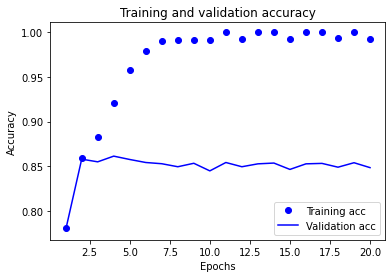

In [39]:
epochs = np.arange(1,21)
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()